# Covid-19 data analysis for the Netherland

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
import seaborn as sns
#import tabula

#from IPython.display import Markdown as md

%run ./data/data.ipynb

Pulling data from sources.json:
(Source: CBS)  deceased @ https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=70895ned&_theme=76
(Source: CBS)  population @ https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=37230ned&_theme=76
(Source: RIVM)  counts_per_municipality @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/5f6bc429-1596-490e-8618-1ed8fd768427
(Source: RIVM)  prevalence @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/097155aa-75eb-4caa-8ed3-4c6edb80467e
(Source: RIVM)  r @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/ed0699d1-c9d5-4436-8517-27eb993eab6e
(Source: RIVM)  homes_for_elderly @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/0179dd26-7bf6-4021-857f-8623aaf8e73a
(Source: RIVM)  homes_for_disabled @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/aa28b74d-7150-47bc-a7cb-98876e93381b
(Source: RIVM)  seventy_plus_living_at_home @ https://da

In [2]:
# defining function for calculating percentage
def percentage(df, d, n):
    name = '%_'+d+'_OF_'+n
    df[name] = df[d]/df[n]*100
    df[name].replace(np.nan, 0, inplace=True)

def moving_average(df, n, p):
    name = 'mva_'+n
    windows = df[n].rolling(p)
    positive_tests[name] = windows.mean()

def running_total(df, n):
    name = 'rt_'+n
    df[name] = np.cumsum(df[n])

In [3]:
def bandwidth(df,s,t=None):
    print(df)
    print(s)
    print(t)
#deceased
#bandwidth(deceased, 'Overledenen_1', 'LeeftijdOp31December')

### deceased
- flow per week:
  - recent years vs. 2020
  - average +- std.dev over this year/last year/last 2 years/5 years
- flow per weekcorona data ()

## Comparing deaths

In [4]:
deaths = per_week[['Deceased','Deceased_covid']]
deaths['Deceased_other'] = deaths['Deceased'] - deaths['Deceased_covid']

# calculate stastics
deaths['mean'] = deaths['Deceased'].mean()
deaths['stddev'] = deaths['Deceased'].std()
deaths['+z'] = deaths['mean']+deaths['stddev']
deaths['-z'] = deaths['mean']-deaths['stddev']
# calculate rolling stastics
deaths['mean_rolling'] = deaths['Deceased'].rolling(window=260).mean()
deaths['stddev_rolling'] = deaths['Deceased'].rolling(window=260).std()
deaths['+z_rolling'] = deaths['mean_rolling']+deaths['stddev_rolling']
deaths['-z_rolling'] = deaths['mean_rolling']-deaths['stddev_rolling']

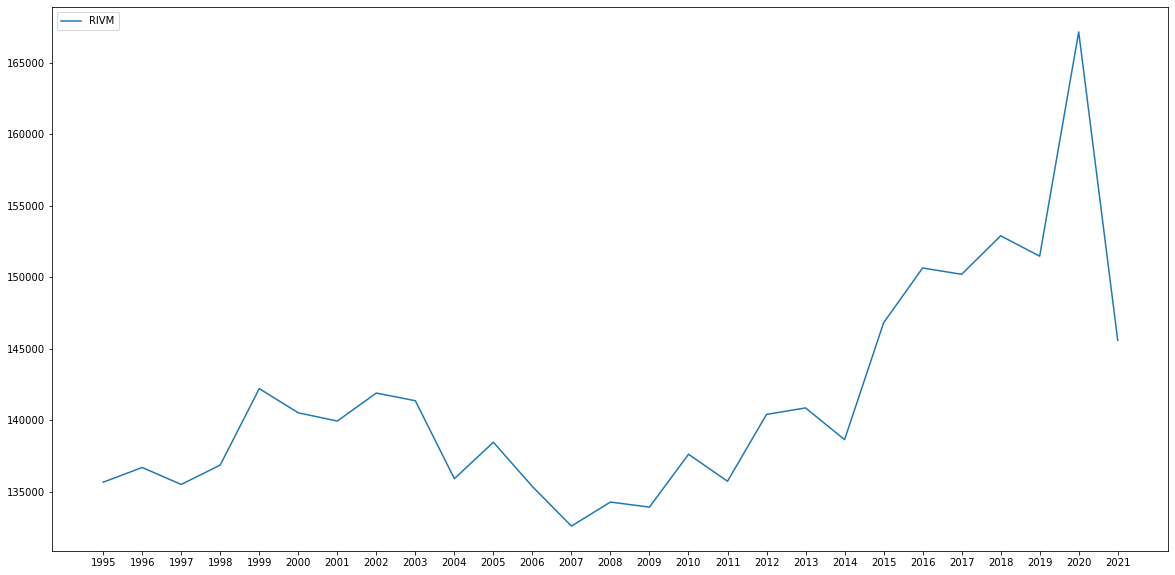

In [5]:
total = deaths.groupby(by='year').sum()
week = deceased_per_week.groupby(by='year').sum()

plt.plot(total.index.astype(str), total.Deceased, label='RIVM')
#plt.plot(deceased_per_year.index.astype(str), deceased_per_year.Deceased, label='CBS')
#plt.plot(week.index.astype(str), week.Deceased, label='CBS, week',linestyle='--')
plt.legend(loc='upper left')
plt.show()

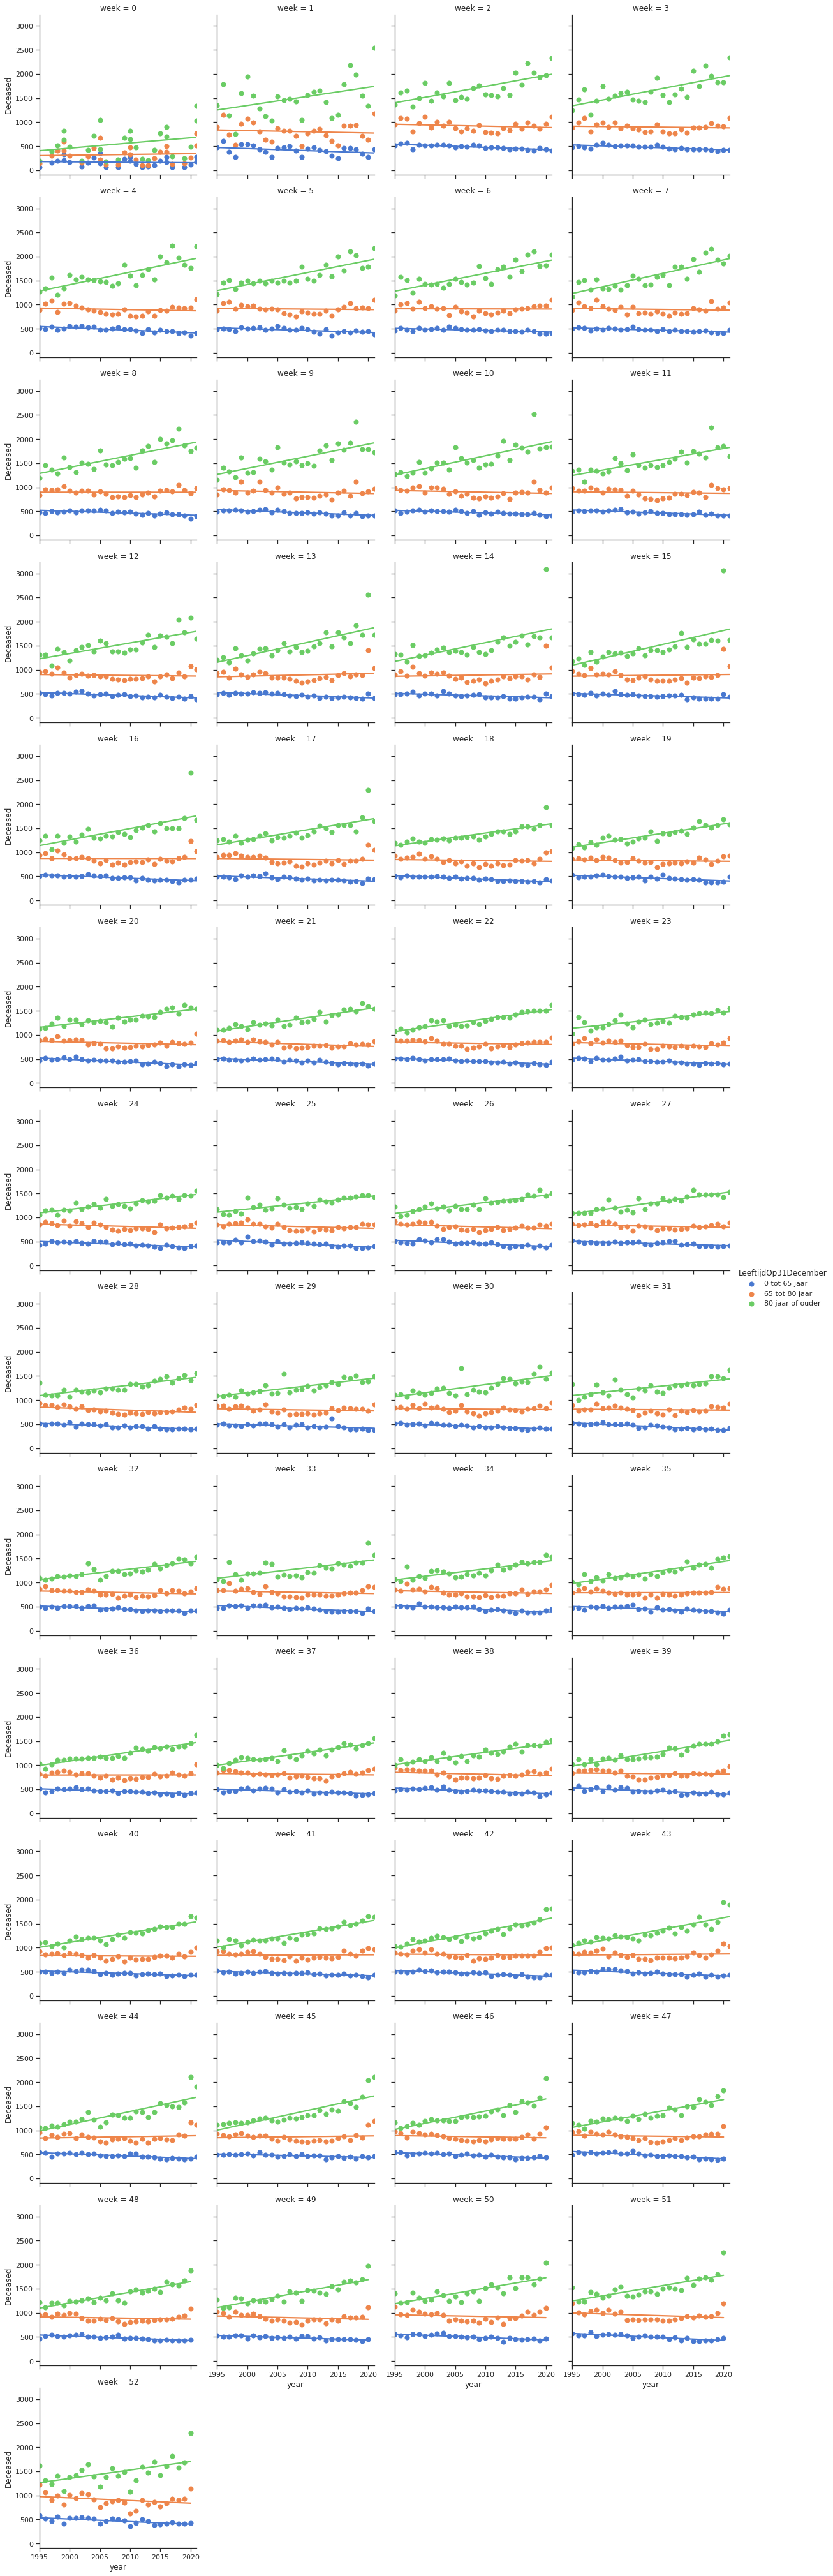

In [6]:
#%matplotlib widget
# set data
deaths['indexx'] = deaths.index.to_numpy()
deaths['rolling'] = deaths.Deceased.rolling(window=4).mean()

sns.set_theme(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="year", y="Deceased", col="week", hue="LeeftijdOp31December", data=deceased_week_agegroup.reset_index(),
           col_wrap=4, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

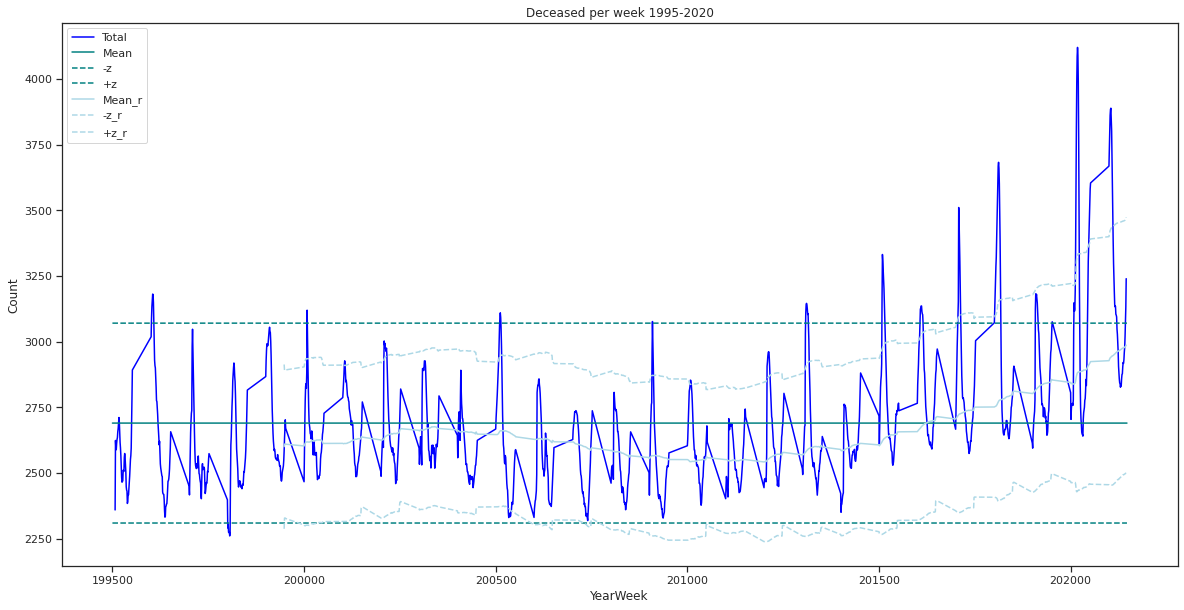

In [7]:
#%matplotlib widget
# set data
x_tot = deaths.reset_index()['year']*100+deaths.reset_index()['week']
y_tot = deaths.Deceased.rolling(window=8).mean()
y_cov = deaths.Deceased_covid.rolling(window=4).mean()
y_oth = deaths.Deceased_other.rolling(window=4).mean()
mean = deaths['mean']
m_37 = deaths['-z']
m_62 = deaths['+z']
mean_rolling = deaths['mean_rolling']
m_37_rolling = deaths['-z_rolling']
m_62_rolling = deaths['+z_rolling']

# set plot
plt.plot(x_tot, y_tot, label='Total', color='blue')
plt.plot(x_tot, mean, label='Mean', color='teal', linestyle='-')
plt.plot(x_tot, m_37, label='-z', color='teal', linestyle='--')
plt.plot(x_tot, m_62, label='+z', color='teal', linestyle='--')
plt.plot(x_tot, mean_rolling, label='Mean_r', color='lightblue', linestyle='-')
plt.plot(x_tot, m_37_rolling, label='-z_r', color='lightblue', linestyle='--')
plt.plot(x_tot, m_62_rolling, label='+z_r', color='lightblue', linestyle='--')
#plt.plot(x_tot, y_cov, label='Covid')
#plt.plot(x_tot, y_oth, label='other', color='y')

plt.title('Deceased per week 1995-2020')
plt.xlabel('YearWeek')
plt.ylabel('Count')
plt.legend(loc='upper left')

# show plot
plt.show()

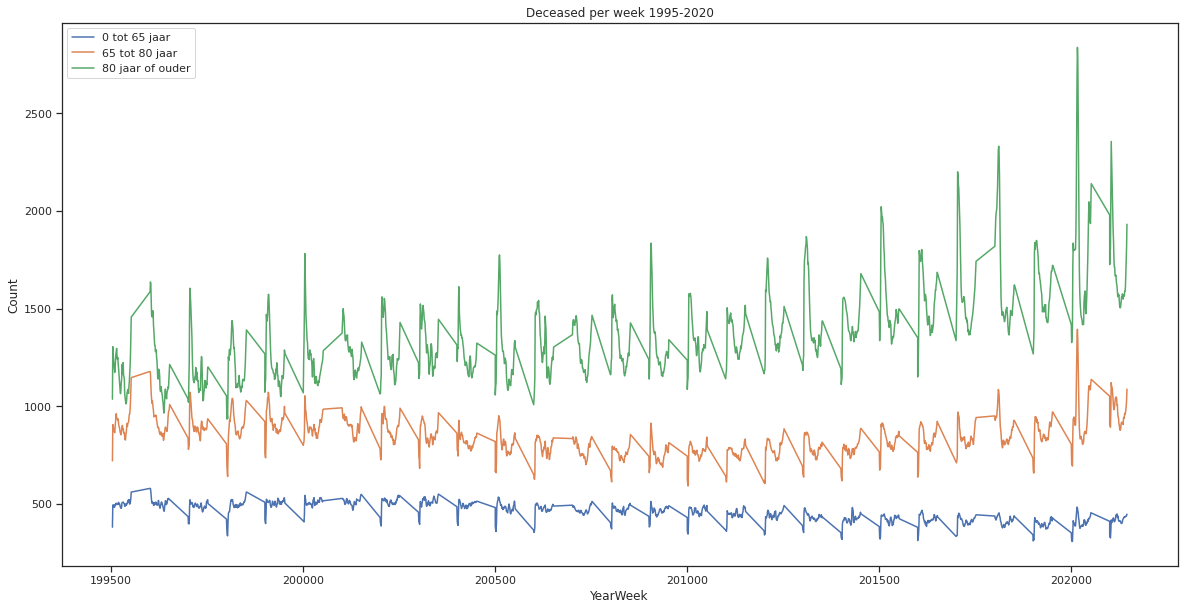

In [8]:
#%matplotlib widget
# set data
x_ = deceased_week_agegroup[deceased_week_agegroup['LeeftijdOp31December'] == '0 tot 65 jaar'].reset_index()['year']*100+deceased_week_agegroup[deceased_week_agegroup['LeeftijdOp31December'] == '0 tot 65 jaar'].reset_index()['week']
y_0 = deceased_week_agegroup.Deceased[deceased_week_agegroup['LeeftijdOp31December'] == '0 tot 65 jaar'].rolling(window=4).mean()
y_65 = deceased_week_agegroup.Deceased[deceased_week_agegroup['LeeftijdOp31December'] == '65 tot 80 jaar'].rolling(window=4).mean()
y_80 = deceased_week_agegroup.Deceased[deceased_week_agegroup['LeeftijdOp31December'] == '80 jaar of ouder'].rolling(window=4).mean()

# set plot
plt.plot(x_, y_0, label='0 tot 65 jaar')
plt.plot(x_, y_65, label='65 tot 80 jaar')
plt.plot(x_, y_80, label='80 jaar of ouder')

plt.title('Deceased per week 1995-2020')
plt.xlabel('YearWeek')
plt.ylabel('Count')
plt.legend(loc='upper left')

# show plot
plt.show()

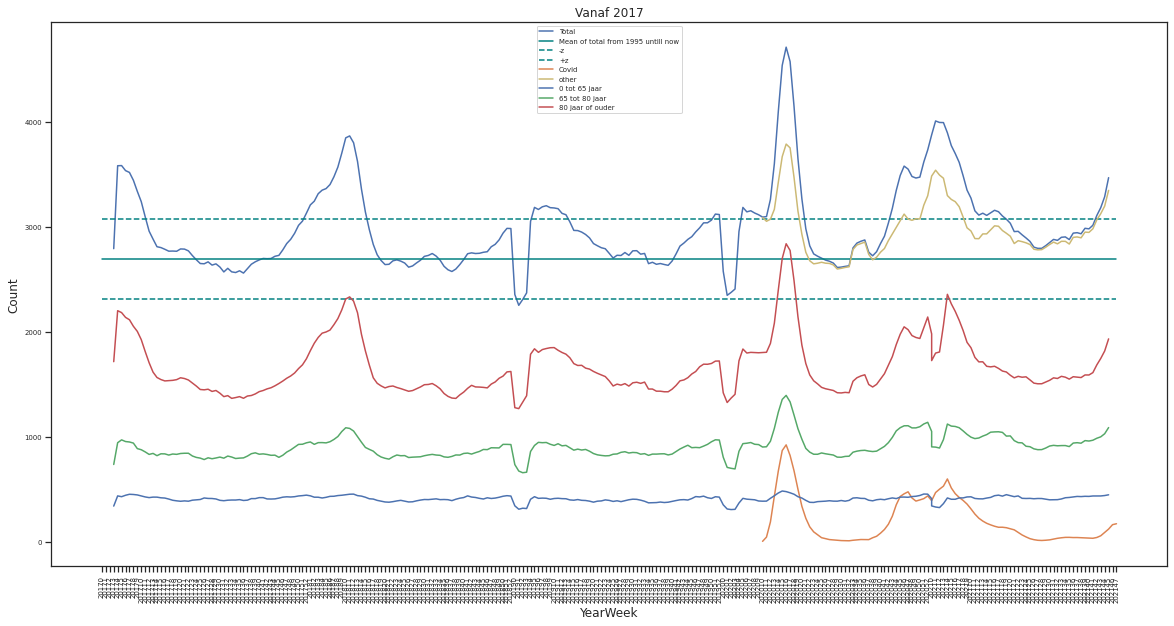

In [9]:
#%matplotlib widget
asof = 2017
deceased_2020_tot = deaths.loc[asof:].reset_index()
# set data
x_tot = deceased_2020_tot['year'].astype(str)+deceased_2020_tot['week'].astype(str)
y_tot = deceased_2020_tot.Deceased.rolling(window=4).mean()
y_cov = deceased_2020_tot.Deceased_covid.rolling(window=4).mean()
y_oth = deceased_2020_tot.Deceased_other.rolling(window=4).mean()
mean = deceased_2020_tot['mean']
m_37 = deceased_2020_tot['-z']
m_62 = deceased_2020_tot['+z']

deceased_2020 = deceased_week_agegroup.reset_index()
deceased_2020 = deceased_2020[deceased_2020['year'] >= asof]

x_ = deceased_2020[deceased_2020['LeeftijdOp31December'] == '0 tot 65 jaar'].year.astype(str)+deceased_2020[deceased_2020['LeeftijdOp31December'] == '0 tot 65 jaar'].week.astype(str)
y_0 = deceased_2020.Deceased[deceased_2020['LeeftijdOp31December'] == '0 tot 65 jaar'].rolling(window=4).mean()
y_65 = deceased_2020.Deceased[deceased_2020['LeeftijdOp31December'] == '65 tot 80 jaar'].rolling(window=4).mean()
y_80 = deceased_2020.Deceased[deceased_2020['LeeftijdOp31December'] == '80 jaar of ouder'].rolling(window=4).mean()

# set plot
plt.plot(x_tot, y_tot, label='Total')
plt.plot(x_tot, mean, label='Mean of total from 1995 untill now', color='teal', linestyle='-')
plt.plot(x_tot, m_37, label='-z', color='teal', linestyle='--')
plt.plot(x_tot, m_62, label='+z', color='teal', linestyle='--')
plt.plot(x_tot, y_cov, label='Covid')
plt.plot(x_tot, y_oth, label='other', color='y')
plt.plot(x_, y_0, color='b', label='0 tot 65 jaar')
plt.plot(x_, y_65, label='65 tot 80 jaar')
plt.plot(x_, y_80, label='80 jaar of ouder')

plt.title('Vanaf '+str(asof))
plt.xlabel('YearWeek')
plt.xticks(rotation=90)
plt.tick_params(labelsize = 'xx-small')
plt.ylabel('Count')
plt.legend(loc='upper center', fontsize='xx-small')

# show plot
plt.show()

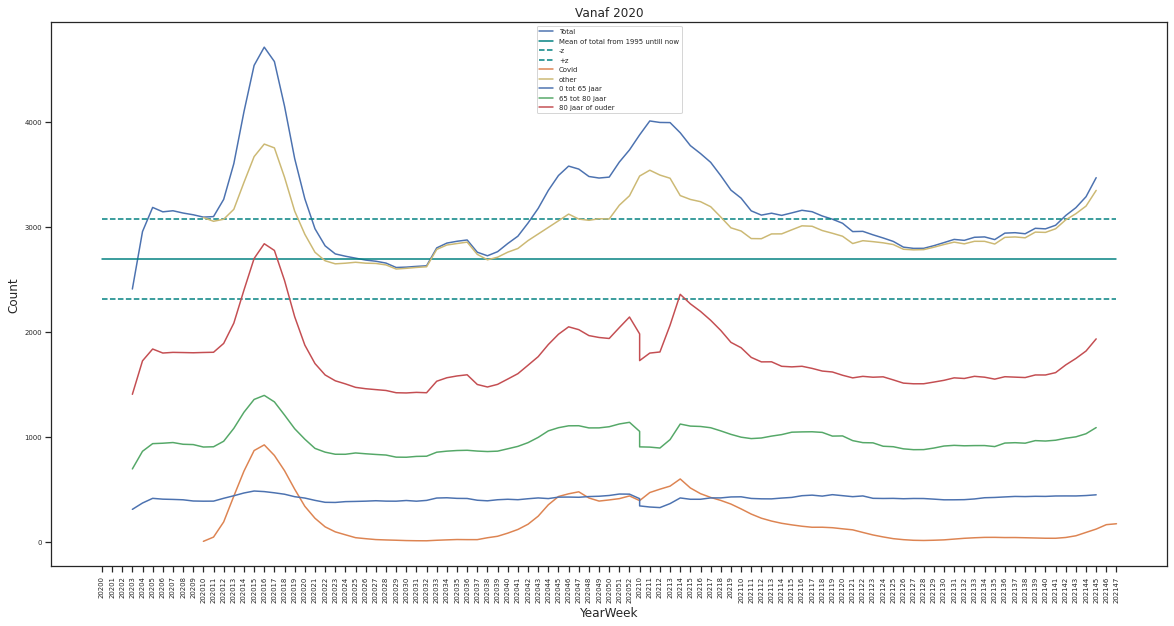

In [10]:
#%matplotlib widget
asof = 2020
deceased_2020_tot = deaths.loc[asof:].reset_index()
# set data
x_tot = deceased_2020_tot['year'].astype(str)+deceased_2020_tot['week'].astype(str)
y_tot = deceased_2020_tot.Deceased.rolling(window=4).mean()
y_cov = deceased_2020_tot.Deceased_covid.rolling(window=4).mean()
y_oth = deceased_2020_tot.Deceased_other.rolling(window=4).mean()
mean = deceased_2020_tot['mean']
m_37 = deceased_2020_tot['-z']
m_62 = deceased_2020_tot['+z']

deceased_2020 = deceased_week_agegroup.reset_index()
deceased_2020 = deceased_2020[deceased_2020['year'] >= asof]

x_ = deceased_2020[deceased_2020['LeeftijdOp31December'] == '0 tot 65 jaar'].year.astype(str)+deceased_2020[deceased_2020['LeeftijdOp31December'] == '0 tot 65 jaar'].week.astype(str)
y_0 = deceased_2020.Deceased[deceased_2020['LeeftijdOp31December'] == '0 tot 65 jaar'].rolling(window=4).mean()
y_65 = deceased_2020.Deceased[deceased_2020['LeeftijdOp31December'] == '65 tot 80 jaar'].rolling(window=4).mean()
y_80 = deceased_2020.Deceased[deceased_2020['LeeftijdOp31December'] == '80 jaar of ouder'].rolling(window=4).mean()

# set plot
plt.plot(x_tot, y_tot, label='Total')
plt.plot(x_tot, mean, label='Mean of total from 1995 untill now', color='teal', linestyle='-')
plt.plot(x_tot, m_37, label='-z', color='teal', linestyle='--')
plt.plot(x_tot, m_62, label='+z', color='teal', linestyle='--')
plt.plot(x_tot, y_cov, label='Covid')
plt.plot(x_tot, y_oth, label='other', color='y')
plt.plot(x_, y_0, color='b', label='0 tot 65 jaar')
plt.plot(x_, y_65, label='65 tot 80 jaar')
plt.plot(x_, y_80, label='80 jaar of ouder')

plt.title('Vanaf '+str(asof))
plt.xlabel('YearWeek')
plt.xticks(rotation=90)
plt.tick_params(labelsize = 'xx-small')
plt.ylabel('Count')
plt.legend(loc='upper center', fontsize='xx-small')

# show plot
plt.show()

<AxesSubplot:>

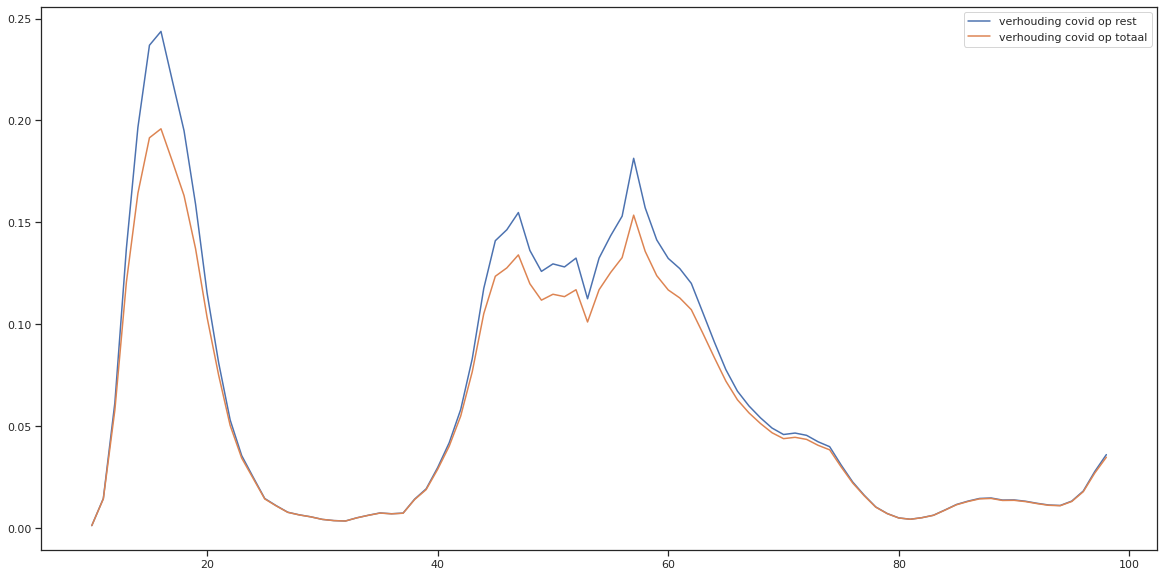

In [11]:
verhouding_covid = pd.DataFrame()
verhouding_covid['verhouding covid op rest'] = y_cov / y_oth
verhouding_covid['verhouding covid op totaal'] = y_cov / y_tot
verhouding_covid.plot()

In [12]:
df = deaths.reset_index()
df = df.groupby('year').mean()
df = df['Deceased']
deceased_extra = deaths.reset_index().merge(df, on='year', how='outer', suffixes=['','_mean_y'])
df = deaths
df = df.groupby('year').std()
df = df['Deceased']
deceased_extra = deceased_extra.merge(df, on='year', how='outer', suffixes=['','_std_y'])
deceased_extra['Deceased-37'] = deceased_extra['Deceased_mean_y']-deceased_extra['Deceased_std_y']
deceased_extra['Deceased+62'] = deceased_extra['Deceased_mean_y']+deceased_extra['Deceased_std_y']
#deceased_extra

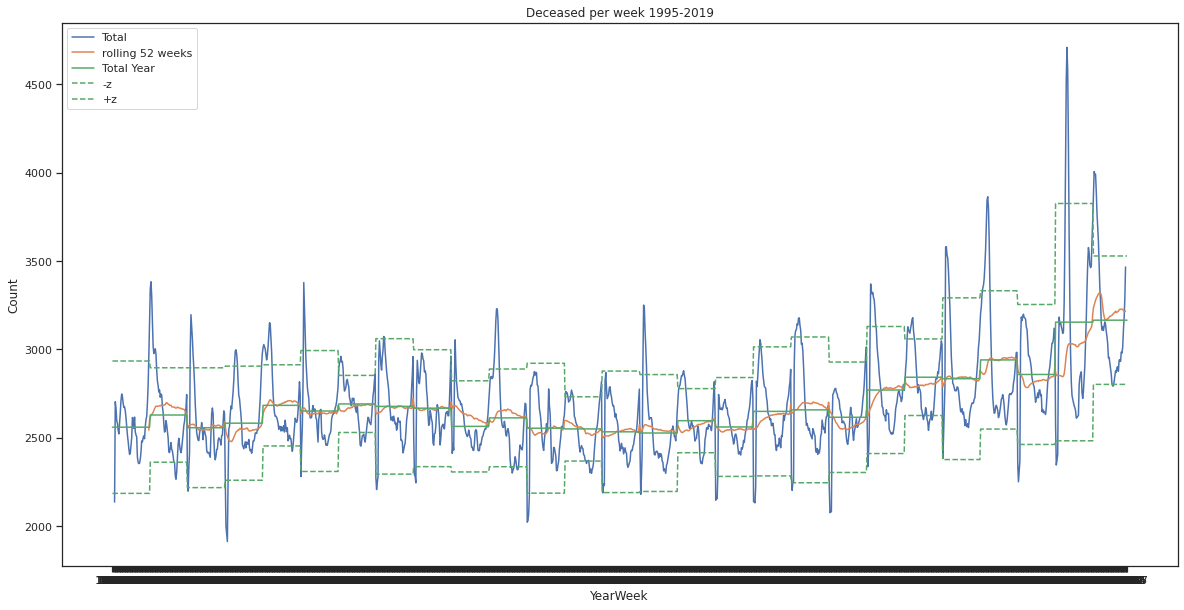

In [13]:
#%matplotlib widget
# set data
deceased_hist = deceased_extra#[deceased_extra.year >= 2020]

x_tot = deceased_hist.year.astype(str)+deceased_hist.week.astype(str)
y_tot = deceased_hist.Deceased.rolling(window=4).mean()
y_jaar = deceased_hist.Deceased.rolling(window=52).mean()
y_ = deceased_hist.Deceased_mean_y
m_37 = deceased_hist['Deceased-37']
m_62 = deceased_hist['Deceased+62']

# set plot
plt.plot(x_tot, y_tot, label='Total')
plt.plot(x_tot, y_jaar, label='rolling 52 weeks')
plt.plot(x_tot, y_, color='g', linestyle='-', label='Total Year')
plt.plot(x_tot, m_37, color='g', linestyle='--', label='-z')
plt.plot(x_tot, m_62, color='g', linestyle='--', label='+z')

plt.title('Deceased per week 1995-2019')
plt.xlabel('YearWeek')
plt.ylabel('Count')
plt.legend()

# show plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1422,) and (101,)

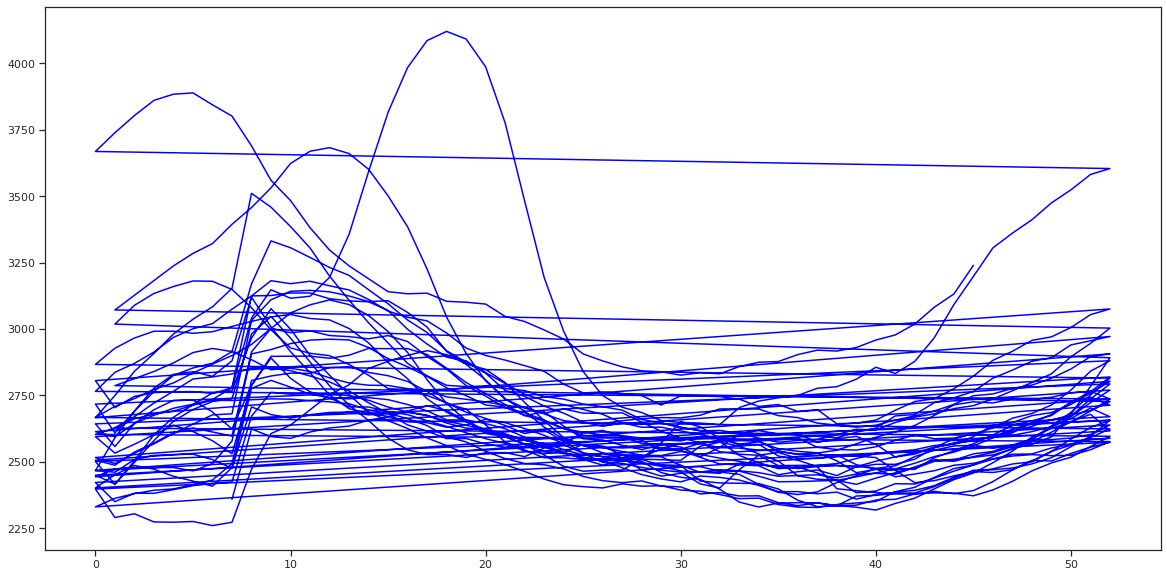

In [14]:
#%matplotlib widget
# set data
x_tot = deaths.reset_index()['week']
y_tot = deaths.Deceased.rolling(window=8).mean()
m_37 = deaths['-z']
m_62 = deaths['+z']
mean_rolling = deaths['mean_rolling']
m_37_rolling = deaths['-z_rolling']
m_62_rolling = deaths['+z_rolling']

# set plot
plt.plot(x_tot, y_tot, label='Total', color='blue')
plt.plot(x_tot, mean, label='Mean', color='teal', linestyle='-')
plt.plot(x_tot, m_37, label='-z', color='teal', linestyle='--')
plt.plot(x_tot, m_62, label='+z', color='teal', linestyle='--')
plt.plot(x_tot, mean_rolling, label='Mean_r', color='lightblue', linestyle='-')
plt.plot(x_tot, m_37_rolling, label='-z_r', color='lightblue', linestyle='--')
plt.plot(x_tot, m_62_rolling, label='+z_r', color='lightblue', linestyle='--')

plt.title('Deceased per week 1995-2020')
plt.xlabel('YearWeek')
plt.ylabel('Count')
plt.legend(loc='upper left')

# show plot
plt.show()

In [ ]:
deceased_year = deaths.groupby('year').cumsum()
deceased_year = deceased_year[['Deceased']]
deceased_year.plot()

In [ ]:
deaths

In [ ]:
deceased_week = deceased_per_week
deceased_week.reset_index(inplace=True)
df = deaths.groupby('week').mean()
df = df['Deceased']
deceased_week = deceased_per_week.merge(df, on='week', how='outer', suffixes=['','_mean_w'])
df = deaths.groupby('week').std()
df = df['Deceased'] 
deceased_week = deceased_week.merge(df, on='week', how='outer', suffixes=['','_std_w'])
deceased_week['Deceased-37'] = deceased_week['Deceased_mean_w']-deceased_week['Deceased_std_w']
deceased_week['Deceased+62'] = deceased_week['Deceased_mean_w']+deceased_week['Deceased_std_w']
deceased_week['YW'] = deceased_week['year'] * 100 + deceased_week['week']
#deceased_week['year'] = deceased_week['YW']/100
deceased_week['year'] = deceased_week['year'].astype(int)
deceased_week

In [ ]:
#%matplotlib widget
# set data
deceased_week_hist = deceased_week#[deceased_week.year == 2021]

x_tot = deceased_week_hist.week
y_tot = deceased_week_hist.Deceased.cumsum()
y_ = deceased_week_hist.Deceased_mean_w.cumsum()
m_37 = deceased_week_hist['Deceased-37'].cumsum()
m_62 = deceased_week_hist['Deceased+62'].cumsum()

# set plot
plt.plot(x_tot, y_tot, label='Total')
#plt.plot(x_tot, y_jaar, label='rolling 52 weeks')
plt.plot(x_tot, y_, color='g', linestyle='-', label='Total Mean')
plt.plot(x_tot, m_37, color='g', linestyle='--', label='-z')
plt.plot(x_tot, m_62, color='g', linestyle='--', label='+z')

plt.title('Deceased per week 1995-2019')
plt.xlabel('YearWeek')
plt.ylabel('Count')
plt.legend()

# show plot
plt.show()

In [ ]:
deaths.corr()

# Deceased relative to population

In [ ]:
print('Calculating percentage deceased of population')
percentage(population,'Deceased','Population')
percentage(population_y,'Deceased', 'Population')
print('DONE')

In [ ]:
print('Ceating dataframe for Nederland')
population_nl = population[population['RegioS'] == 'Nederland']
population = population[population['RegioS'] != 'Nederland']
population_y_nl = population_y[population_y['RegioS'] == 'Nederland']
population_y = population_y[population_y['RegioS'] != 'Nederland']
print('DONE')
population_y_nl

In [ ]:
# add total for 2020 if missing
try:
    population_y_nl.loc[pd.Period("2020"),]
    print('2020 in dataframe: skipping')
except:
    print('2020 missing in dataframe: adding total from other dataframe')
    population_y_nl.loc[pd.Period("2020"),'year'] = "2020"
    population_y_nl.loc[pd.Period("2020"),'Deceased'] = deaths.loc[(2020,),'Deceased'].sum()
    population_y_nl['Born'] = population_nl['Born'].mean()
    born2020 = population_nl.loc["2020",'Born'].sum()/11/12
    population_y_nl.loc[pd.Period("2020"),'Population'] = born2020+population_y_nl.loc[pd.Period("2019"),'Population']
    percentage(population_y_nl,'Deceased','Population')
population_y_nl['%_Deceased_OF_Population_1']= population_y_nl['%_Deceased_OF_Population']*200000
#for year,born in population['year','Born']:
#    population.loc[year,'Born'] = born.mean()
#population_y_nl['Born'] = population_nl['Born'].mean()
population_y_nl

In [ ]:
population_nl.plot(subplots=True,figsize=(10,10))
population_nl.pivot(index='month',columns='year', values='Deceased').plot(figsize=(10,5))
population_nl.pivot(index='month',columns='year',values='%_Deceased_OF_Population').plot(figsize=(10,))

In [ ]:
x=population_y_nl.index
print(x)
ax=population_y_nl.plot(kind='line', y='Deceased', color='DarkBlue',figsize=(10,5))
ax2=population_y_nl.plot(kind='line',y='%_Deceased_OF_Population', secondary_y=True,color='Red', ax=ax)
ax.set_ylabel('Deceased')
ax2.set_ylabel('% of population')
plt.tight_layout()
plt.show()

### and then reproducting the coronadashboard
The data I use is the sources used formhet Coronadashbord of the Dutch government. https://coronadashboard.rijksoverheid.nl/
  
This contains:
*medical indicators*

In [ ]:
positive_tests.corr()

In [ ]:
rivm_date_of_report = positive_tests.loc[0,'Date_of_report']
print('Date of report for RIVM positive tests data = ' + str(rivm_date_of_report))
positive_tests = positive_tests.drop(columns='Date_of_report')

In [ ]:
# cumulatives
running_total(positive_tests, 'Total_reported')
running_total(positive_tests, 'Hospital_admission')
running_total(positive_tests, 'Deceased')

In [ ]:
# percentages
percentage(positive_tests, 'rt_Deceased', 'rt_Total_reported')
percentage(positive_tests, 'rt_Deceased', 'rt_Hospital_admission')
percentage(positive_tests, 'rt_Hospital_admission', 'rt_Total_reported')

In [ ]:
pfr = positive_tests.loc[positive_tests.index.argmax(),'%_rt_Deceased_OF_rt_Total_reported']
hfr = positive_tests.loc[positive_tests.index.argmax(),'%_rt_Deceased_OF_rt_Hospital_admission']
print('pfr on '+rivm_date_of_report+ 'is '+str(pfr)+'%')
print('hfr on '+rivm_date_of_report+ 'is '+str(hfr)+'%')

In [ ]:
positive_tests.plot(figsize=(20,20),subplots=True)
positive_tests.plot(y=['Total_reported', 'Hospital_admission', 'Deceased'], figsize=(20, 10))
positive_tests.plot(y=['rt_Total_reported', 'rt_Hospital_admission', 'rt_Deceased'], figsize=(20, 10))
positive_tests.plot(y=['%_rt_Deceased_OF_rt_Total_reported', '%_rt_Deceased_OF_rt_Hospital_admission', '%_rt_Hospital_admission_OF_rt_Total_reported'], figsize=(20, 10))

In [ ]:
positive_tests = positive_tests.set_index(pd.PeriodIndex(positive_tests['Date_of_publication'], freq='d'))
positive_tests = positive_tests.drop(columns='Date_of_publication')
positive_tests['P'] = positive_tests.index.strftime('%Y-%m')
positive_tests = positive_tests.rename(index={'Date_of_publication':'date'})
positive_tests

In [ ]:
positive_tests_nl = positive_tests.sum(level='Date_of_publication')
positive_tests_nl['P'] = positive_tests_nl.index.strftime('%Y-%m')
positive_tests_nl

In [ ]:
pop_latest = population_nl.loc[population_nl['P'].max(),'Population']
pop_latest

In [ ]:
print(type(population_nl.P[0]))
print(type(positive_tests_nl.P[0]))

pd.merge_asof(positive_tests_nl,population_nl,left_on='P',right_on='P')

# Gemiddeld aantal positief geteste mensen per 100.000 inwoners
## Dit getal laat zien van hoeveel mensen gisteren per 100.000 inwoners gemeld is dat ze positief getest zijn en COVID-19 hebben.
positive_tests_nl['p100k'] = positive_tests_nl['Total_reported'] / population_nl.loc[if(positive_tests_nl['P'] > population_nl['P'].max()):
                                                                                     population_nl.loc[positive_tests_nl['P'],'Population']
                                                                                else:
                                                                                     positive_tests_nl['P']
                                                                                ,'Population'] * 100000


#pt_agg['mov_avg_p100k'] = np.average(pt_agg['']])
#np.mean(pt[len(pt.columns)-1].Total_reported)

In [ ]:
# Aantal positief geteste mensen
## Dit getal laat zien van hoeveel mensen gisteren gemeld is dat ze positief getest zijn en COVID-19 hebben.

In [ ]:
#Verdeling positief geteste mensen in Nederland
## per gemeente

## per veiligheidsregio



# TESTING BOKEH WITH OTHER DATA
pt_agg = pt.groupby(by=['Date_of_report'],as_index=False).sum()

q = figure(plot_width=800, plot_height=400, title="My Line Plot", x_axis_type="datetime")

q.multi_line(
    xs=[
        pt_agg['Date_of_report'],
        pt_agg['Date_of_report'],
        pt_agg['Date_of_report']
    ],
    ys=[
        pt_agg['Deceased'], 
        pt_agg['Hospital_admission'],
        pt_agg['Total_reported']
    ],
    color=viridis(len(pt_agg.columns)-1)
)

show(q)

In [ ]:
print("- Percentage positive tested of all tests done")
# https://www.rivm.nl/archief-weekrapportages-covid-19-in-nederland
pt_perc = tabula.read_pdf('https://www.rivm.nl/sites/default/files/2020-10/COVID-19_WebSite_rapport_wekelijks_20201013_1159_0.pdf', pages=29, guess=True, stream=True)
print(pt_perc)
## To DO:
## 1) extract data from latest pdf
## 2) scrape all pdfs for data to compare data thought time

In [ ]:
print("- number of infectious people")
# https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/097155aa-75eb-4caa-8ed3-4c6edb80467e
infected = pd.read_json('https://data.rivm.nl/covid-19/COVID-19_prevalentie.json')
print(infected.head())

In [ ]:
print("- R (reproductionnumber)")
# https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/ed0699d1-c9d5-4436-8517-27eb993eab6e
R = pd.read_json('https://data.rivm.nl/covid-19/COVID-19_reproductiegetal.json')
print(R.head())

In [ ]:
print("- hospital admissions per day")
# NICE https://www.databronnencovid19.nl/Bron?naam=Nationale-Intensive-Care-Evaluatie
hosp_nice = pd.read_json('https://stichting-nice.nl/covid-19/public/intake-count/')
print(hosp_nice.head())
# LCPS https://lcps.nu/datafeed/
hosp_lcps = pd.read_csv('https://lcps.nu/wp-content/uploads/covid-19.csv')
print(hosp_lcps.head())
# Dashbaord changed source data https://www.nu.nl/coronavirus/6083846/ministerie-meldde-maandenlang-veel-te-weinig-opnames-coronapatienten.html
# other sources: https://www.stichting-nice.nl/covid-19-op-de-zkh.jsp
# 37852, 84522NED

In [ ]:
print("- icu admissions per day")
# url
ic_NICE_new_intake = pd.read_json('https://stichting-nice.nl/covid-19/public/new-intake/').T
ic_NICE_new_intake0 = pd.DataFrame()
for row in ic_NICE_new_intake[0]:
    ic_NICE_new_intake0 = ic_NICE_new_intake0.append(row, ignore_index=True)
print(ic_NICE_new_intake0)
ic_NICE_new_intake0['date'] = ic_NICE_new_intake['date']
ic_NICE_new_intake1 = pd.DataFrame()
for row in ic_NICE_new_intake[1]:
    ic_NICE_new_intake1 = ic_NICE_new_intake1.append(row, ignore_index=True)
ic_NICE_new_intake01 = pd.concat([ic_NICE_new_intake0,ic_NICE_new_intake1])
print(ic_NICE_new_intake01.head())
ic_NICE_new_intake_confirmed = pd.read_json('https://stichting-nice.nl/covid-19/public/new-intake/confirmed/')
#print(ic_NICE_new_intake_confirmed.head())
ic_NICE_intake_count = pd.read_json('https://stichting-nice.nl/covid-19/public/intake-count/')
#print(ic_NICE_intake_count.head())
print('IC data: 3 sources IMPORTED')
## To DO: conpare ic1 and ic2
#other sources: 

In [ ]:
ic_NICE_new_intake0

In [ ]:
# 84069NED

# SINGLE LINE TEST
# create a new plot (with a title) using figure
ic_new_intake0 = figure(plot_width=800, plot_height=400, x_axis_type="datetime", title="NICE new-intake")
# add a line renderer 
ic_new_intake0.line(
    ic_NICE_new_intake0['date'], 
    ic_NICE_new_intake0['value']
)
show(ic_new_intake0)

# SINGLE LINE TEST
# create a new plot (with a title) using figure
ic_new_intake_confirmed = figure(plot_width=800, plot_height=400, x_axis_type="datetime", title="NICE new-intake confirmed")
# add a line renderer 
ic_new_intake_confirmed.line(
    ic_NICE_new_intake_confirmed['date'], 
    ic_NICE_new_intake_confirmed['value']
)

# SINGLE LINE TEST
# create a new plot (with a title) using figure
ic_intake_count = figure(plot_width=800, plot_height=400, x_axis_type="datetime", title="NICE intake count")
# add a line renderer 
ic_intake_count.line(
    ic_NICE_intake_count['date'], 
    ic_NICE_intake_count['value']
)

## MULTIPLE LINE TEST
ic_all = figure(title="IC1 & IC_opnames_NICE", plot_width=800, plot_height=400, x_axis_type="datetime")

ic_all.multi_line([ic1.date, ic_opnames.date],
              [ic1.value, ic_opnames.value],
              color=viridis(3))

show(ic_new_intake)
show(ic_new_intake_confirmed)
show(ic_intake_count)
show(ic_all)

In [ ]:
## sources NICE for their website:
# /covid-19/public/zkh/global
# /covid-19/public/zkh/new-intake/
# /covid-19/public/zkh/intake-count/
# /covid-19/public/zkh/intake-cumulative/
# /covid-19/public/zkh/died-and-survivors-cumulative/
# /covid-19/public/zkh/age-distribution-died-and-survivors/
# /covid-19/public/zkh/age-distribution-status/
# /covid-19/public/zkh/behandelduur-distribution/
# /covid-19/public/zkh/behandelduur-distribution/
## TO DO: check which used and which to use extra.
## sources LCPS?
# https://lcps.nu/wp-content/uploads/
## Maybe scrape website to find more public data: https://scrapy.org/ OR https://www.crummy.com/software/BeautifulSoup/bs4/doc/

*early signs*

In [ ]:
print("- patient reporting covid symptoms at family doctor")
# https://www.nivel.nl/nl/nivel-zorgregistraties-eerste-lijn/nivel-zorgregistraties-eerste-lijn


In [ ]:
print("- sewagewate")
# https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/a2960b68-9d3f-4dc3-9485-600570cd52b9
sw = pd.read_json('https://data.rivm.nl/covid-19/COVID-19_rioolwaterdata.json')
print(sw.head())

*homes for elderly*

In [ ]:
print("- positive testst")
# from pdf. https://www.rivm.nl/documenten/wekelijkse-update-epidemiologische-situatie-covid-19-in-nederland

In [ ]:
print("- infected locations")
# from pdf. https://www.rivm.nl/documenten/wekelijkse-update-epidemiologische-situatie-covid-19-in-nederland

In [ ]:
print("- number deseased")
# from pdf. https://www.rivm.nl/documenten/wekelijkse-update-epidemiologische-situatie-covid-19-in-nederland

**metadata**

In [ ]:
print("- municipalities in Netherlands")
## https://www.cbs.nl/nl-nl/onze-diensten/methoden/classificaties/overig/gemeentelijke-indelingen-per-jaar/indeling%20per%20jaar/gemeentelijke-indeling-op-1-januari-2020
municipality = pd.read_excel('https://www.cbs.nl/-/media/_excel/2020/03/gemeenten-alfabetisch-2020.xlsx')
print(municipality.head())
# aantallen per gemeente: https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/5f6bc429-1596-490e-8618-1ed8fd768427


### missing data, i would like to calculate of collect
- covid numbers relitive to all data
- deseased for whole country (possible source: https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/1c0fcd57-1102-4620-9cfa-441e93ea5604)

### more data

- Karakteristieken elke geteste persoon: https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/2c4357c8-76e4-4662-9574-1deb8a73f724?tab=relations
- https://data.rivm.nl